<a href="https://colab.research.google.com/github/minz1337/CS431/blob/main/BaiTap_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Load the Data and Libraries
---

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
data = pd.read_csv("food_truck_dataset.txt")
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Visualize the Data
---

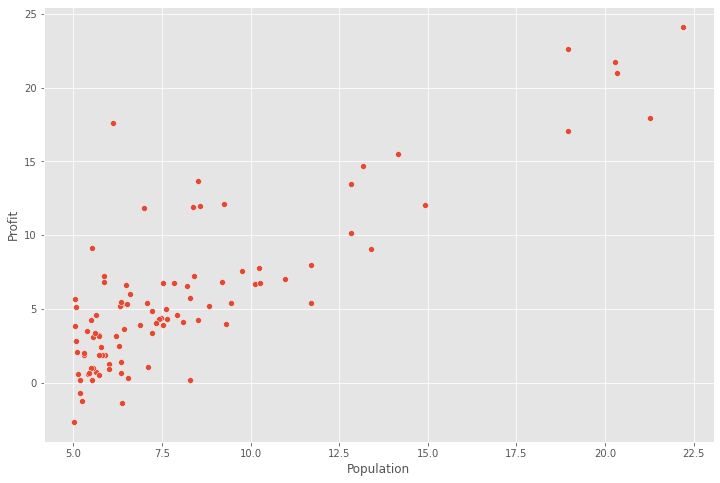

In [ ]:
ax = sns.scatterplot(x='Population', y='Profit', data=data) # trực quan hóa dữ liệu

### Compute the Cost $J(\theta)$
---

Mục tiêu của hồi quy tuyến tính (Linear Regression) là giảm thiểu hàm chi phí

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

kết quả dự đoán $h_{\theta}(x)$ :

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [ ]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) ** 2
    return 1 / (2 * m) * np.sum(error)

In [ ]:
m = data.Population.values.size
# add another dimension to accomodate the intercept term and set it to all ones
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis=1)
y = data.Profit.values.reshape(m, 1)
theta = np.zeros((2,1))
cost_function(X, y, theta)

32.072733877455676

### Gradient Descent
---

Tối thiểu hàm giá trị $J(\theta)$ được cập nhật theo công thức dưới đây
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ .

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations): 
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(X, y, theta))
        
    return theta, costs

In [ ]:
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=1000)

print("h(x) = {} + {}x".format(str(round(theta[0, 0], 2)),
                                str(round(theta[1, 0], 2))))

h(x) = -3.79 + 1.18x


In [ ]:
costs[999]

4.47802760987997

### Visualising the Cost Function $J(\theta)$
---

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

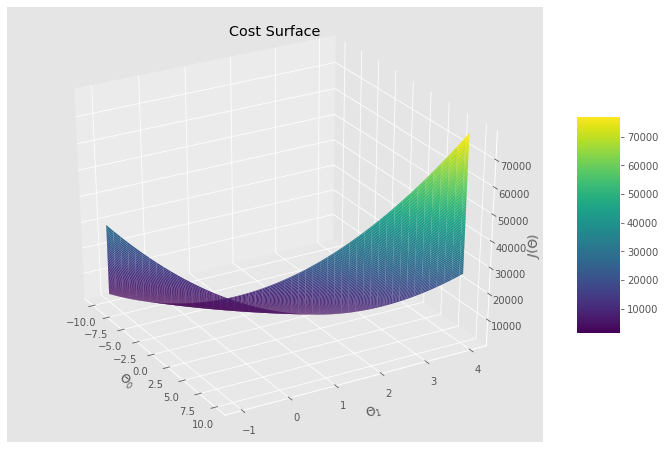

In [ ]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = "viridis", linewidth = 0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.set_title("Cost Surface")
ax.view_init(30,330)

plt.show()

###  Plotting the Convergence
---

 $J(\theta)$ với mỗi vòng lặp thuật toán gradient descent:

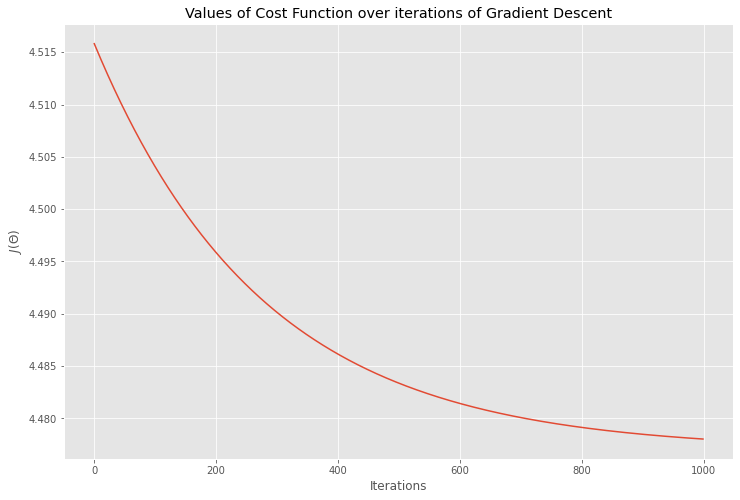

In [ ]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

### Training Data with Linear Regression Fit
---

In [ ]:
theta.shape

(2, 1)

In [ ]:
theta

array([[-3.78806857],
       [ 1.18221277]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


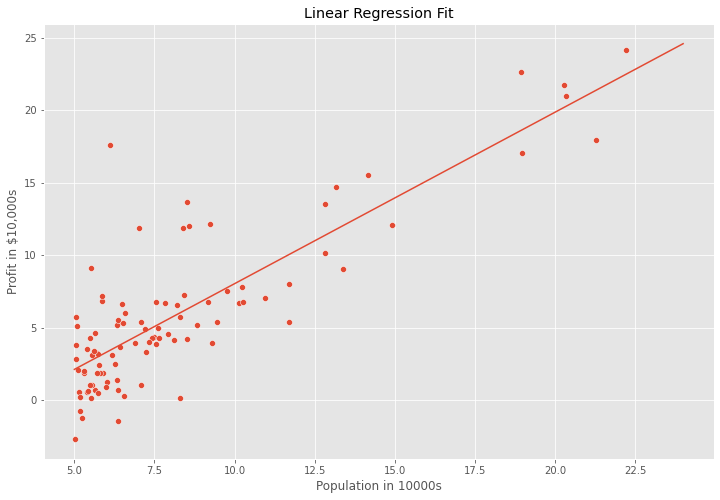

In [ ]:
theta = np.squeeze(theta)
sns.scatterplot(x = "Population", y= "Profit", data = data)

x_value=[x for x in range(5, 25)]
y_value=[(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value,y_value)

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regression Fit");

### Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [ ]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [ ]:
y_pred_1 = predict(np.array([1, 4]),theta) * 10000
print("For a population of 40,000, the model predicts a profit of $" + str(round(y_pred_1, 0)))

For a population of 40,000, the model predicts a profit of $9408.0
